# Project: LRH-1
# Article: Ligand regulation of full-length LRH-1 associates with a novel metric of compound binding energy.
# Analyst: David Foutch
# Date: 06/26/2023
# Update: 07/019/2023
<br></br>

---
<font color=#A30000 size="6"><b>1. PURPOSE OF THIS NOTEBOOK</b></font>

---


<font size="4">To Demonstrate how network analysis was used to identify physical mechanisms in structural data associated with differences in protein regulation.</font>

<font size="4">The following is a detailed description of how I used network analysis to identify mechanistic associations in the stability and regulation of 18 protein structures. However, <i>any</i> data that can be organized into a matrix form can benefit from the insights generated by a network, or systems, analysis.</font>
<br></br>

---
<font color=#A30000 size="6"><b>2. DESCRIBING THE PROBLEM:</b></font>

---

<font size="4">Wet lab research identified a set of low $\Delta\Delta$<i>G</i> and a set of high $\Delta\Delta$<i>G</i> structures associated, respectively, with phospholipid and small molecule binding (see Fig 1A). This is a statistically significant, empirical observation. My task was to use network analysis to identify, if possible, any network features that might offer an explanantion as to why these sets of proteins "behave" as they do. </font>
<br></br>

<font size="4"><b>NOTE: This work is in revision so details regarding this research may be omitted.</b><font> 

<h1>Figure 1</h1>
<div>
<img src="dilemma.png" width="600"/>
</div>


---
<font color=#A30000 size="6"><b>3. REVIEW OF THE RESULT:</b></font>

---


<br></br>
<font size="4">There are two key results that offer insight into <i>why</i> these two groups of proteins may be sorted by their energetic equilibrium, or $\Delta\Delta$<i>G</i> (see Fig 2). <font color=#A30000><b>First</b></font>, when the average eigenvector centrality of each secondary structure (helices, sheets, and loops) for each protein was used as features in the principal components analysis (PCA) the low $\Delta\Delta$<i>G</i> and the high $\Delta\Delta$<i>G</i> proteins clustereded nicely into two groups (see Fig 2A). What this indicates is that there is a set of secondary structures that are creating the variance between the equilibrium states. The bi-plot of the PCA indicated that helix 6 and helix 3 are significantfactors to understanding this variance between the two groups. <font color=#A30000><b>Second</b></font>, on inspection of the set of edges unique to the low $\Delta\Delta$<i>G</i> PSNs and high $\Delta\Delta$<i>G</i> PSNs. It is observed that there is a greater degree of connectivity between helices 3 and 6 at the enzymatic site indicating that the opening is more restricted requiring greater energy to achieve small molecule binding to reach energetic equilibrium (see Fig 2B).      



<h1>Figure 2</h1>
<div>
<img src="solution.png" width="600"/>
</div>

---
<font color=#A30000 size="6"><b>4. OVERVIEW OF THE PIPELINE:</b></font>

---


<br></br>
<ol>
  <li style="font-size:25px"><font size="4">The data consists of 18 X-ray crystallography files containing the molecular coordinates of all atoms for each protein structure. The protein of interest is the human liver receptor homolog-1 (LRH-1). The 18 LRH-1 structures are divided into two grous. One group contains small molecule binding to LRH-1. The other group contains phospholipid binding to LRH-1. These 18 files were downloaded from the <a href="https://www.rcsb.org/">Protein Data Bank (PDB)</a> and used for analysis. The files are 1YOK, 1YUC, 1ZDU, 3PLZ, 3TX7, 4DOR, 4DOS, 4IS8, 4ONI, 4PLD, 4PLE, 4RWV, 5L11, 5SYZ, 6OQX, 6OQY, 6OR1, and 6VC2.</font></li>
  <br>
  <li style="font-size:25px"><font size="4">Each PDB file was submitted to the <a href="https://bio.tools/ring">Residue Interaction Network Generator (RING) server</a> which generates a link between amino acids based on a Euclidean, or distance, threshold measured in <span>&#8491;</span>ngstroms. The RING server generates a .pdb_ringnodes file which is a record of residue interactions for each protein structure. These files were used for creating adjacency lists for network visualization and analysis.</font></li>
  <br>
  <li style="font-size:25px"><font size="4">The <a href="https://networkx.org/">Networkx</a> Python package creates a graph object from the adjacency list generated by the RING server. This graph object is used by Networkx has a wide-range of methods to perform network analysis. In this work Networkx is used to evaluate the eigenvector centrality (EC) of each residue in the LRH-1 PSNs.</font></li>
  <br>
    <li style="font-size:25px"><font size="4">A number of straightforward anaylyses are performed in <a href="https://www.python.org/">Python </a> in order to understand the distribution of EC across the topology of the network. The PCA clusters protein structures and visualizes similarity in variation. The line graphs, Venn diagrams, and scatterplots were used to explore potential associations in variability.</font></li> 
  <br>
  <li style="font-size:25px"><font size="4">Finally, <a href="https://www.cgl.ucsf.edu/chimerax/">ChimeraX</a> is used to visualize how the edges generated by the RING server are distributed throughout the 3D structure of the protein. This is useful in demonstrating how the EC variance in the PSNs is related to the physical features of the protein structure. This also aids in conceptualizing how these physical features may explain changes in protein function.</font></li>
</ol>

<h1>Figure 3.</h1>
<div>
<img src="pipeline2.png"/>
</div>

---
<font color=#A30000 size="6"><b>5. OVERVIEW OF THE DATA &#150; PDB FILE ENTRIES:</b></font>

---

<font style="font-size: 20px">PDB files are entensive records. It is beyond the scope of this project to go into all the details of a standard PDB file format. However, the following review of the fields of a typical PDB file will aid in following the progressive logic of each step of the analysis.</font> 
<br></br>


# Table 1. A set of PDB file columns and their field values:

In [4]:
df=pd.read_csv('./text_files/pdbDescription.csv',header=0)
df.style.set_table_attributes('style="font-size: 16px"')

,Column names,Description
0,Record:,Identifies the record type 'ATOM'
1,Count:,The serial number for each atom in the amino acid (AA) sequence
2,Atom id:,Atom identifier
3,Amino Acid:,Three letter AA code
4,Chain:,Identifier for a linear polymer terminated by an amine and carboxyl group
5,Position:,Residue sequence number
6,x-coord:,The X coordinate measured in Ångstroms
7,y-coord:,The Y coordinate measured in Ångstroms
8,z-coord:,The Z coordinate measured in Ångstroms
9,Occupancy:,1.0


# Table 2. Typical PDB file layout for ATOM entries:

In [5]:
df=pd.read_csv('./text_files/1yok_pdb.txt',sep='\t',header=0)
df.iloc[0:11].style.set_table_attributes('style="font-size: 16px"')

,Record,Count,Atom id,Amino acid,Chain,Position,x-coord,y-coord,z-coord,Occupancy,B-factor,Atom
0,ATOM,1,N,SER,A,300,28.985000,54.267000,34.372000,1.000000,88.630000,N
1,ATOM,2,CA,SER,A,300,27.739000,54.655000,33.649000,1.000000,88.620000,C
2,ATOM,3,C,SER,A,300,27.105000,53.481000,32.897000,1.000000,89.530000,C
3,ATOM,4,O,SER,A,300,27.492000,53.158000,31.774000,1.000000,90.120000,O
4,ATOM,5,CB,SER,A,300,28.029000,55.799000,32.671000,1.000000,87.830000,C
5,ATOM,6,OG,SER,A,300,26.852000,56.199000,31.985000,1.000000,84.700000,O
6,ATOM,7,HN1,SER,A,300,29.407000,55.049000,34.873000,1.000000,0.000000,H
7,ATOM,8,HN2,SER,A,300,29.656000,53.832000,33.739000,1.000000,0.000000,H
8,ATOM,9,HN3,SER,A,300,28.816000,53.480000,34.998000,1.000000,0.000000,H
9,ATOM,10,HG,SER,A,300,27.032000,56.908000,31.379000,1.000000,0.000000,H


---
<font color=#A30000 size="6"><b>6. GENERATING PSNS FROM PDB FILES USING THE RING</b></font> 
<br></br>
<font color=#A30000 size="6"><b>SERVER:</b></font>
---

<h1>Figure 4.</h1>
<br></br>
<div>
<img src="PDBtoRING.png" width="1000"/img>
</div>

<font style="font-size: 20px"><b>Figure 4.</b> Each <a href="https://www.rcsb.org/">Protein Data Bank (PDB)</a> file was submitted to the <a href="https://bio.tools/ring">Residue Interaction Network Generator (RING) server</a> which generates a link between amino acids based on a Euclidean, or distance, threshold measured in <span>&#8491;</span>ngstroms. The RING server generates a .pdb_ringnodes file which is a record of residue interactions for each protein structure. These files were used for creating adjacency lists for network visualization and analysis.</font>

<font color=#A30000 size="6"> Preliminary step: Importing Python packages</font>

In [2]:
# Import necessary packages to perform the analysis demonstrated below.

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib_venn import venn2,venn2_circles
from matplotlib import pyplot as plt
import csv
from plotly.subplots import make_subplots
import plotly.graph_objects as go

<font color=#A30000 size="6">The RING server</font>

<font style="font-size: 18px">Using the RING server is straightforward. The file of interest can be directly loaded from the PDB website or it can be uploaded from a local file. The RING server will generate a file similar to the _ringnodes file shown below. Of primary interest are columns "NodeId1" and "NodeId2". After some text editing, these two columns were used to create an adjacency or edge list (below).</font> 
<br>

# Table 3. RING server _ringnodes output file

In [20]:
df=pd.read_csv('./text_files/1yok_ringnodes.txt',sep='\t',header=0)
df.style.set_table_attributes('style="font-size: 16px"')

,NodeId1,Interaction,NodeId2,Distance,Energy,Atom1,Atom2,Donor,Positive,Cation,Orientation,Model
0,A:300:_:SER,VDW:MC_SC,A:488:_:ASN,3.976000,6.000000,C,ND2,1,nan,nan,nan,nan
1,A:301:_:ILE,VDW:SC_SC,A:305:_:ILE,3.655000,6.000000,CG2,CG2,1,nan,nan,nan,nan
2,A:301:_:ILE,VDW:SC_SC,A:306:_:LEU,3.774000,6.000000,CB,CD2,1,nan,nan,nan,nan
3,A:301:_:ILE,VDW:SC_SC,A:446:_:ARG,3.918000,6.000000,CD1,CD,1,nan,nan,nan,nan
4,A:302:_:PRO,VDW:SC_SC,A:305:_:ILE,4.186000,6.000000,CB,CD1,1,nan,nan,nan,nan
5,A:302:_:PRO,VDW:SC_SC,A:484:_:TYR,3.588000,6.000000,CD,CD2,1,nan,nan,nan,nan
6,A:304:_:LEU,VDW:MC_SC,A:307:_:GLU,4.153000,6.000000,C,CB,1,nan,nan,nan,nan
7,A:304:_:LEU,VDW:MC_SC,A:308:_:LEU,4.021000,6.000000,C,CG,1,nan,nan,nan,nan
8,A:304:_:LEU,VDW:SC_SC,A:365:_:PHE,3.644000,6.000000,CD1,CZ,1,nan,nan,nan,nan
9,A:304:_:LEU,VDW:SC_SC,A:476:_:GLN,3.651000,6.000000,CD1,NE2,1,nan,nan,nan,nan


# Table 4. An example of an edge list after processing the _ringnodes file:

In [28]:
df=pd.read_csv('./text_files/1yok_edgeList.txt',sep='\t',header=None)
df.columns=['Source node','Target node']
df.iloc[0:12].style.set_table_attributes('style="font-size: 16px"')

,Source node,Target node
0,300:SER,488:ASN
1,301:ILE,305:ILE
2,301:ILE,306:LEU
3,301:ILE,446:ARG
4,302:PRO,305:ILE
5,302:PRO,484:TYR
6,304:LEU,307:GLU
7,304:LEU,308:LEU
8,304:LEU,365:PHE
9,304:LEU,476:GLN


---
<font color=#A30000 size="6"><b>7. GENERATING EIGENVECTOR CENTRALITY VALUES</b></font>
<br></br>
    <font color=#A30000 size="6"><b>FOR EACH PSN USING PYTHON'S NETWORKX:<b></font>

---

<h1>Figure 6.</h1>
<div>
<img SRC="RINGtoPYTHON.png" width="700"/img>
</div>

<font style="font-size:18px"><b>Figure 6.</b> The <a href="https://networkx.org/">Networkx</a> Python package creates a graph object from the adjacency list generated by the RING server. This graph object is used by Networkx has a wide-range of methods to perform network analysis. In this work Networkx is used to evaluate the eigenvector centrality (EC) of each residue in the LRH-1 PSNs.</font></li>
<br></br>

# Table 5. Generating EC multiplots:

Text(0.5, 0.055, 'Residue Position')

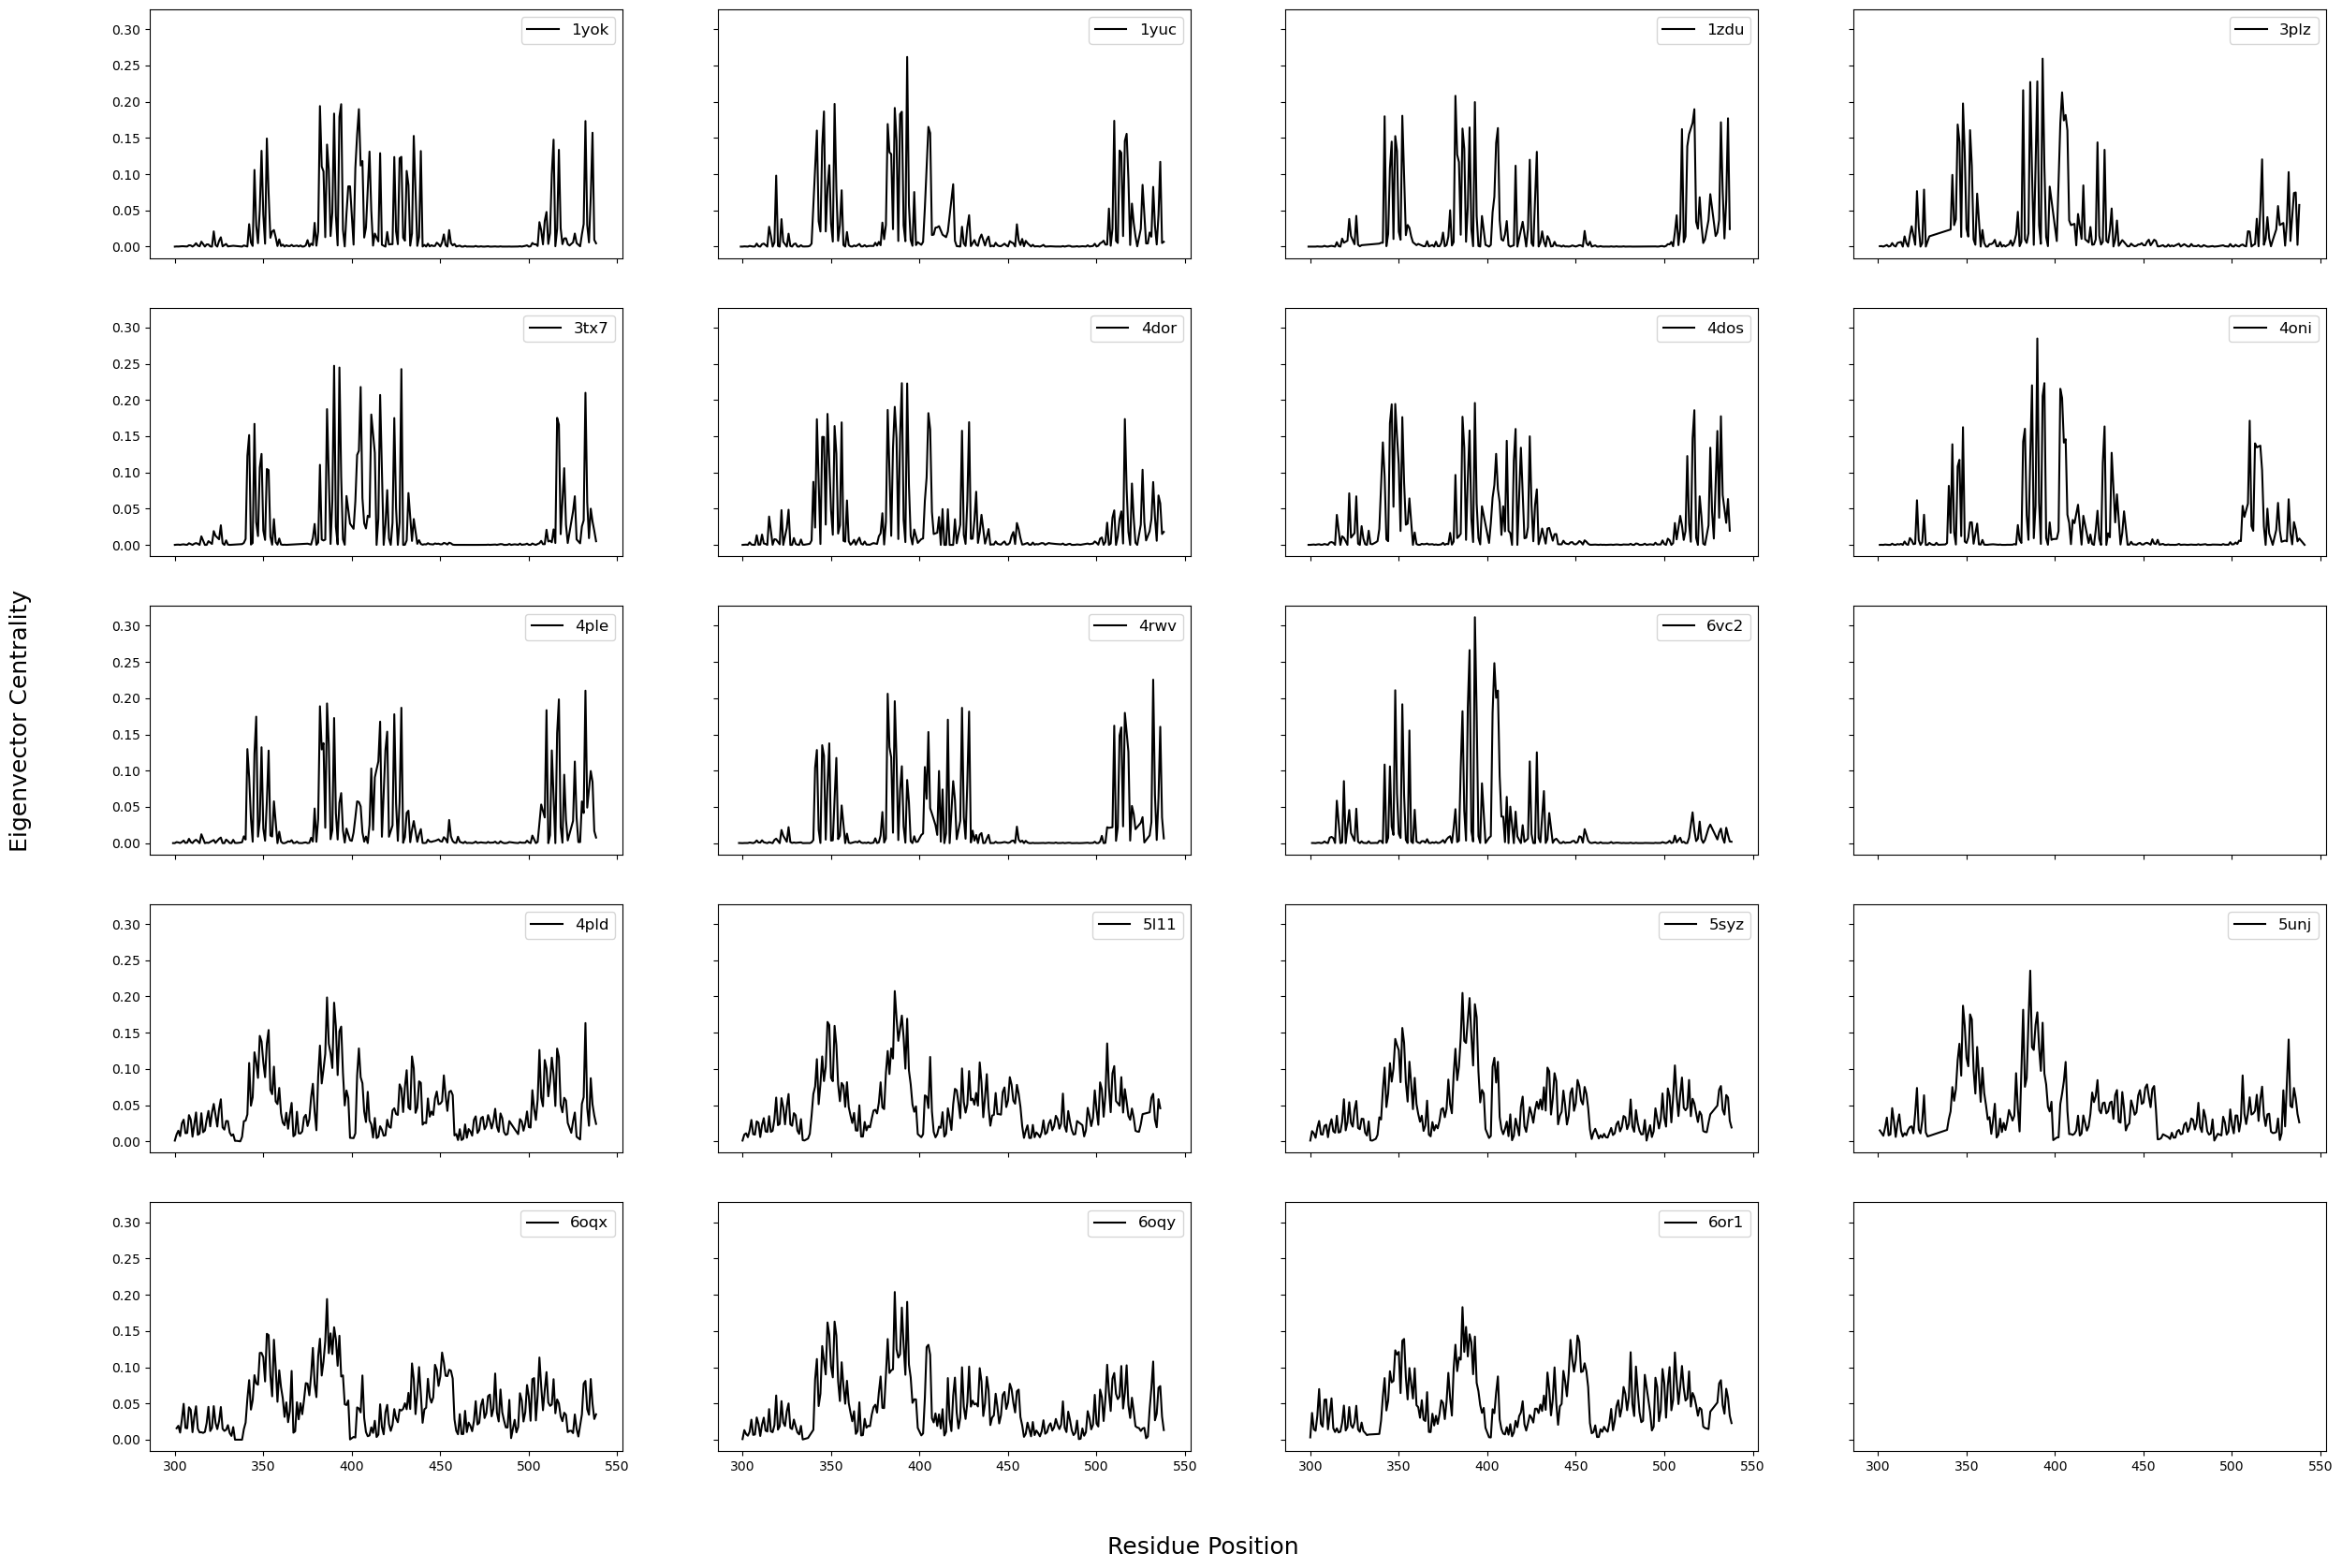

In [8]:
fig, axs = plt.subplots(5,4,figsize=(30,20),sharey=True, sharex=True)
pdbList=[['1yok','1yuc','1zdu','3plz'],['3tx7','4dor','4dos','4oni'],['4ple','4rwv','6vc2','NA'],
         ['4pld','5l11','5syz','5unj'],['6oqx','6oqy','6or1','NA']]

path = "./ec_value_plots"

for j in range(5):
    for k in range(4):
        X = []
        Y = []
        if pdbList[j][k] != 'NA':
            i=pdbList[j][k]
            pathToFile=path+"/eigen_"+i+"_plt"
            with open(pathToFile, 'r') as file:
                plotting = csv.reader(file, delimiter='\t')
                for ROWS in plotting:
                    X.append(int(ROWS[0]))
                    Y.append(float(ROWS[1]))

                axs[j,k].plot(X, Y, color="black", label=i)
                axs[j,k].legend(fontsize="12")


# plt.xticks(np.arange(210, 485, 25))

# # plt.title('')
fig.text(0.075, 0.5, 'Eigenvector Centrality', va='center', rotation='vertical',fontsize=18)
fig.text(0.5, 0.055, 'Residue Position', ha='center',fontsize=18)

# plt.savefig('nr5a1_plts.png')

<font style="font-size:18px"><b>Table 5.</b> The x-axis plots the physical sequence (or, primary structure) of each residue of the protein. The y-axis plots the eigenvector centrality value for each residue in the sequence. On visual inspection it seems reasonable that these these protein systems may be clustered into two groups. It also seems reasonable that principal components analysis PCA)is a reasonable approach for investigating what features are driving this variance.</font>
<br></br>

---
<font color=#A30000 size="6"><b>8. PERFORMING PCA USING SECONDARY STRUCTURES:</b></font>

---

<h1>Figure 8.</h1>
<div>
<img SRC="ECSecStruct.png" width="700" /img>
<div>

# Table 6. The targets (rows) and features (columns) used in the PCA

In [53]:
#Load the table as a Pandas dataframe.
"""Note: That the 'pdb_file' entries contain the list of 'targets' used in the PCA described below.
   The column names are the list of secondary structures of LRH-1. Each (i,j) entry is the average EC value 
   for the secondary structure associated with the PDB file of that row.""" 

df=pd.read_csv('./text_files/secondary_structure_pca.txt',sep='\t',header=0)
df.style.set_table_attributes('style="font-size: 16px"')

,pdb_file,helix1,helix2,loop1,helix3,helix4,helix5,sheet1,loop2,sheet2,helix6,helix7,helix8,loop3,helix9,loop4,helix10,helix11,loop5,helix12
0,1yok,0.000576,0.003654,0.000314,0.031029,0.001018,0.052709,0.150762,0.053812,0.060763,0.026101,0.042471,0.004820,0.000790,0.000157,0.000023,0.000498,-0.029088,0.004879,0.061481
1,1yuc,0.000743,0.012840,0.000890,0.057354,0.001669,0.060717,0.056455,0.076121,0.018289,0.008388,0.008053,0.005091,0.003343,0.000391,0.000141,0.001046,-0.048620,0.027062,0.039156
2,1zdu,0.000202,0.007947,0.000460,0.050669,0.002127,0.050298,0.039572,0.072325,0.017996,0.018922,0.018822,0.002609,0.001172,0.000081,0.000011,0.000377,-0.050530,0.020620,0.072636
3,3plz,0.001271,0.015656,0.000000,0.055139,0.004365,0.054102,0.127785,0.116407,0.011096,0.025060,0.021333,0.004178,0.000761,0.001090,0.000129,0.000836,-0.015597,0.023692,0.037046
4,3tx7,0.000625,0.005513,0.000427,0.044520,0.000000,0.043169,0.104700,0.075048,0.072745,0.061702,0.030444,0.001431,0.000022,0.000218,0.000203,0.000574,-0.025690,0.020532,0.054883
5,4dor,0.002067,0.010955,0.001888,0.067321,0.004443,0.058594,0.054307,0.080375,0.018431,0.016435,0.029738,0.007632,0.000997,0.000904,0.000169,0.001584,-0.028626,0.028174,0.040670
6,4dos,0.000402,0.028617,0.005939,0.067000,0.000911,0.038745,0.059149,0.065611,0.060590,0.048827,0.022908,0.002705,0.000157,0.000440,0.000227,0.001477,0.034294,0.036000,0.061556
7,4oni,0.000312,0.008313,0.000734,0.033683,0.000433,0.057376,0.145752,0.071987,0.021481,0.015991,0.030568,0.001800,0.001175,0.000278,0.000082,0.000854,-0.044903,0.017223,0.018641
8,4pld,0.019235,0.030206,0.007326,0.081821,0.029528,0.085718,0.076756,0.061078,0.019302,0.014691,0.054611,0.056935,0.008931,0.023157,0.004250,0.023564,-0.070372,0.014760,0.064728
9,4ple,0.001660,0.002323,0.001876,0.045064,0.001737,0.046692,0.049928,0.015369,0.048707,0.063348,0.031489,0.005911,0.001757,0.000692,0.000124,0.000884,-0.046582,0.030244,0.069936


# Table 7. Inspect PC1 and PC2

In [54]:
df=pd.read_csv('./text_files/transpose_for_pca.txt',sep='\t',header=0)
df=df.drop(['seq_pos','seq_id','sec_struct'], axis=1)


scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

pca = PCA(n_components=2)
PC_scores = pd.DataFrame(pca.fit_transform(df_scaled),
               columns = ['PC 1', 'PC 2'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], 
                        index=list(df.columns.values))
loadings.style.set_table_attributes('style="font-size: 16px"')

,PC1,PC2
1yok,0.230914,-0.181243
1yuc,0.250479,-0.148688
1zdu,0.252150,-0.204559
3plz,0.250873,-0.165109
3tx7,0.228274,-0.262484
4dor,0.262657,-0.129846
4dos,0.024133,0.314485
4oni,0.234650,-0.186726
4pld,0.260003,0.169378
4ple,0.218371,-0.232409


# Figure 9. Visualizing the PCA two component biplot

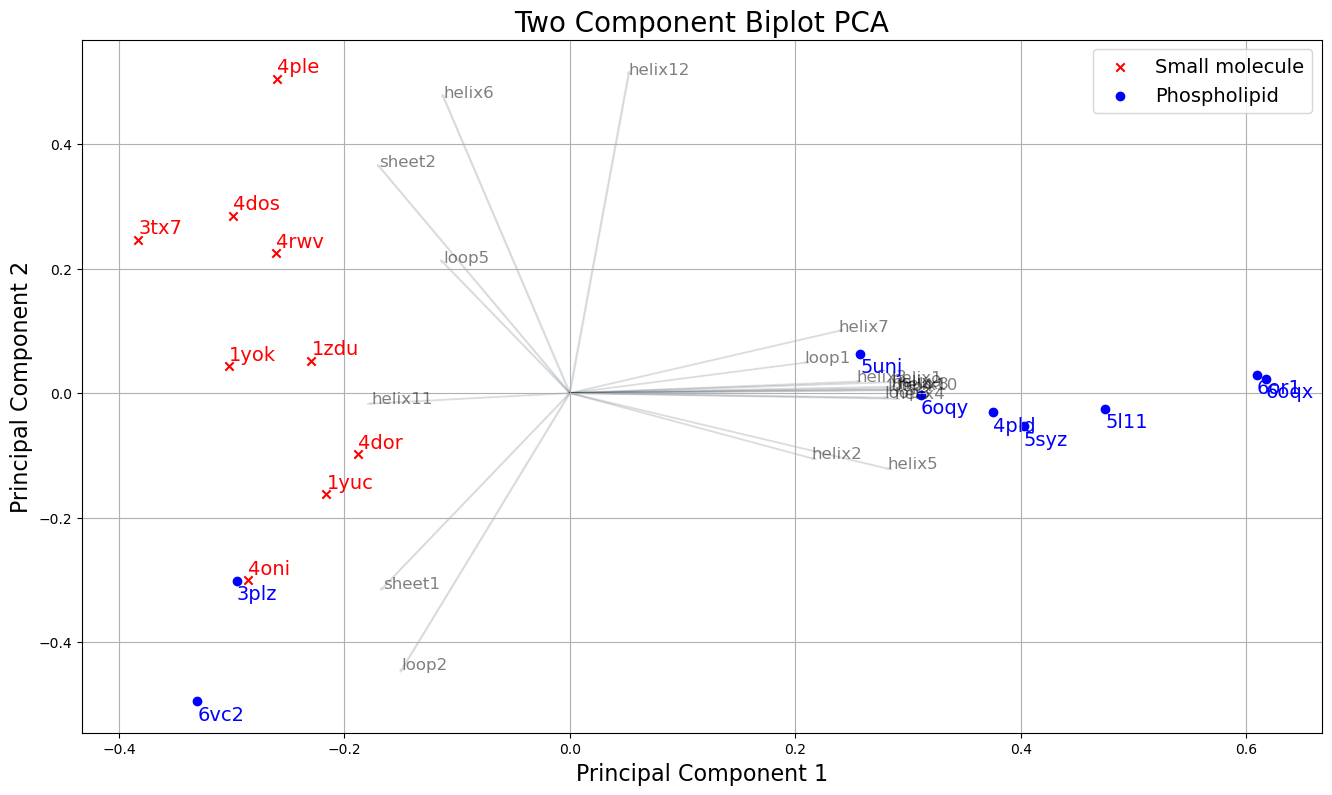

In [52]:
# The 'targets' are the protein structures represented by the four character name of each PDB file
# and the 'features' are the secondary structures (helices, strands, sheets, loops) associated with LRH-1

targets = ['1yok','1yuc','1zdu','3plz','3tx7','4dor','4dos','4oni','4pld','4ple','4rwv',
    '5l11','5syz','5unj','6oqx','6oqy','6or1','6vc2']

features = ['helix1', 'helix2', 'loop1', 'helix3', 'helix4', 'helix5', 'sheet1',
       'loop2', 'sheet2', 'helix6', 'helix7', 'helix8', 'loop3', 'helix9',
       'loop4', 'helix10', 'helix11', 'loop5', 'helix12']

df=pd.read_csv('./text_files/secondary_structure_pca.txt',sep='\t',header=0)
df2=df.drop(columns=['pdb_file'])

x = df2.loc[:,features].values
y = df['pdb_file']
y = y.to_frame()


x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents, 
                           columns = ['PC 1', 'PC 2'])

finalDF = pd.concat([principalDF, y], axis=1)

scalePC1 = 1.0/(finalDF['PC 1'].max() - finalDF['PC 1'].min())
scalePC2 = 1.0/(finalDF['PC 2'].max() - finalDF['PC 2'].min())


ldngs = pca.components_
featuresList = list(df2.columns.values)

fig, ax = plt.subplots(1,1,figsize=(16,9))

# ax = fig.add_subplot(1,1,1) 

ldngs = pca.components_
featuresList = list(df2.columns.values)

for i, feature in enumerate(featuresList):
    ax.arrow(0, 0, ldngs[0, i], 
             ldngs[1, i], alpha=0.1)
    ax.text(ldngs[0, i] * 1.0, 
            ldngs[1, i] * 1.0, 
            feature, fontsize=12, alpha=0.5)

ax.set_xlabel('Principal Component 1', fontsize = 16)
ax.set_ylabel('Principal Component 2', fontsize = 16)
ax.set_title('Two Component Biplot PCA', fontsize = 20)



set9 = finalDF[finalDF['pdb_file'].isin(['1yok','1yuc','1zdu','3tx7','4dor', '4dos','4oni','4ple','4rwv'])]

set10 = finalDF[finalDF['pdb_file'].isin(['3plz','4pld','5l11','5syz','5unj','6oqx','6oqy','6or1','6vc2'])]



ax.scatter(set9['PC 1']*scalePC1, set9['PC 2']*scalePC2,color='red',marker='x',label='Small molecule')
ax.scatter(set10['PC 1']*scalePC1, set10['PC 2']*scalePC2,color='blue',label='Phospholipid')

ax.legend(loc='upper right',fancybox=True,fontsize=14)
ax.grid()    

for i in range(0,9):
    plt.text(set9.iloc[i,0]*scalePC1, set9.iloc[i,1]*scalePC2+0.01, set9.iloc[i,2], color='red',fontsize = 14)

for i in range(9):
    plt.text(set10.iloc[i,0]*scalePC1, set10.iloc[i,1]*scalePC2-0.03, set10.iloc[i,2], color='blue',fontsize = 14)  
    
# plt.savefig('/Users/davidfoutch/Desktop/David/new_two_component_biplot_pca.png') 


---
<font color=#A30000 size="6"><b>9. SET OF EDGES UNIQUE TO THE SMALL MOLECULE AND </b></font>
<br></br>
<font color=#A30000 size="6"><b>LIPID GROUPS:</b></font>
---

<font style="font-size: 20px">Among some of the final questions we asked were "What edges are unique to each of the clusters?" and "What, if any, biological significance would these edges have?" To answer these questions we performed the follwoing steps:</font> 
<br>


<ol>
  <li style="font-size:25px"><font size="4">A complete set of unique edges for all small-molecule PSNs and a complete set of unique edges for all lipid PSNs were collected into separate lists.</font></li>
  <br>
  <li style="font-size:25px"><font size="4">These sets of uniques edges were compared and all edges that were shared in both lists were removed so that only those edges that were strictly unique to each group remained (See Table 8 below).</font></li>
  <br>
  <li style="font-size:25px"><font size="4">These edges were mapped back to diagrams of the 3D protein structure and these were investigated for biological significance.<font size="4"></font></li>
</ol>

# Table 8. Venn diagram of the size of unique edges per group and the intersection

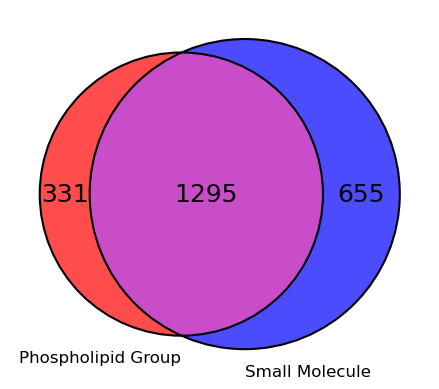

In [56]:
out=venn2(subsets = (331, 655, 1295), set_labels = ('Phospholipid Group', 'Small Molecule'), set_colors=("red","blue"), alpha=0.7)
venn2_circles(subsets=(331,655,1295), linewidth=1.5, color='black') 

for text in out.subset_labels:
    if text == 0:
        break
    else:
        text.set_fontsize(18)

---
<font color=#A30000 size="6"><b>10. PROTEIN STRUCTURE NETWORK</b></font>
<br></br>
<font color=#A30000 size="6"><b>REPRESENTATIONS:</b></font>
---

<font style="font-size: 20px">The Last three figures show different ways on visualizing PSNs. The first two figures show PSNs mapped to the 3D structure of LRH-1 using <a href="https://pypi.org/project/py3Dmol/">py3Dmol</a>. The last figure is a PSN using the more familiar 2D network representation. This network was created using <a href="https://d3js.org/">D3.js</a></font> 
<br>

<ol>
  <li style="font-size:25px"><font size="4">This first 3D structure below shows the set of unique edges for all small molecule bound PSNs. The helices that are colored red was used to examine the role of helices 6,12.</font></li>
  <br>
  <li style="font-size:25px"><font size="4">This second 3D structure below shows the set of unique edges for all phospholipid bound PSNs. Again, the helices that are colored red was used to examine the role of helices 6,12.</font></li>
  <br>
  <li style="font-size:25px"><font size="4">The third and last PSN was used simply to demonstrate an alternative means of presenting the same information.<font size="4"></font></li>
</ol>

In [10]:
import pandas as pd
import py3Dmol

df = pd.read_csv("4pld.txt", sep="\t")

view = py3Dmol.view(query='pdb:4PLD')
chA = {'chain':'A'}
chB = {'chain':'B'}
view.addSurface(py3Dmol.VDW,{'opacity':0.4,'color':'white'}, chA)
view.setStyle(chA,{'cartoon': {'color':'white'}})
view.setStyle(chB,{'': {'color':None}})
view.setHoverable({},True,'''function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.resn+":"+atom.atom,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }}''',
               '''function(atom,viewer) { 
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                }''')



resset = [370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,
          390,391,392,393,394,395,396,397,398,530,531,532,533,534,535,536,537,538]
for i in resset:
    view.addStyle({'chain':'A','resi': i},{'cartoon':{'color':'red'}})

for i in range(723):
    
    view.addCylinder(
        {'start':dict(x=df.iloc[i][2],y=df.iloc[i][3],z=df.iloc[i][4]),
        'end':dict(x=df.iloc[i][5],y=df.iloc[i][6],z=df.iloc[i][7]),
        'radius':0.12,
        'fromCap':1,
        'toCap':1,
        'color':'teal',
        'dashes':False
        }
    ) 
                                                 
view.render()





You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
import pandas as pd
import py3Dmol

df = pd.read_csv("1yok.txt",sep="\t")

view = py3Dmol.view(query='pdb:1YOK')
chA = {'chain':'A'}
# chB = {'chain':'B'}
view.addSurface(py3Dmol.VDW,{'opacity':0.4,'color':'white'}, chA)
view.setStyle(chA,{'cartoon': {'color':'white'}})
view.setStyle(chB,{'': {'color':None}})
view.setHoverable({},True,'''function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.resn+":"+atom.atom,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }}''',
               '''function(atom,viewer) { 
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                }''')



resset = [370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,
          390,391,392,393,394,395,396,397,398,530,531,532,533,534,535,536,537,538]
for i in resset:
    view.addStyle({'chain':'A','resi': i},{'cartoon':{'color':'red'}})

for i in range(373):
    
    view.addCylinder(
        {'start':dict(x=df.iloc[i][2],y=df.iloc[i][3],z=df.iloc[i][4]),
        'end':dict(x=df.iloc[i][5],y=df.iloc[i][6],z=df.iloc[i][7]),
        'radius':0.12,
        'fromCap':1,
        'toCap':1,
        'color':'teal',
        'dashes':False
        }
    ) 
    
for i in range(373):
    
    view.addCylinder(
        {'start':dict(x=df.iloc[i][2],y=df.iloc[i][3],z=df.iloc[i][4]),
        'end':dict(x=df.iloc[i][5],y=df.iloc[i][6],z=df.iloc[i][7]),
        'radius':0.12,
        'fromCap':1,
        'toCap':1,
        'color':'teal',
        'dashes':False
        }
    ) 
                                                 
view.render()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
from IPython.display import IFrame

IFrame(src='./d3graph2.html', width=900, height=600)

In [5]:
import matplotlib as mpl
import networkx as nx
import pandas as pd
import random
import numpy as np
from visJS2jupyter import visJS_module

In [7]:
G = nx.read_adjlist("/Users/davidfoutch/Desktop/David/4pld/4pld_edgeList.txt")
nodes = list(G.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0nodes = list(G.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0
edges = list(G.edges()) # for nx 2.0, returns an "EdgeView" object rather than an iterable
# pos = nx.spectral_layout(G)

# df = pd.read_csv("4pld_node_pos.txt", sep="\t")
df = pd.read_csv("/Users/davidfoutch/Desktop/jupyter_notebooks/4pld.txt", sep="\t")

for i in range(239):
    nodes_dict = [{"id":n,
                   "degree":nx.degree(G,n),
                   "x":df.iloc[0][2],
                   "y":df.iloc[0][3]}  for n in nodes
                  ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":'orange',"title":'test'} # remember (source, target, key)
              for i in range(len(edges))]

# set some network-wide styles
visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_size_multiplier=3,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_width=3,
                          max_velocity=1,
                          min_velocity=1,
                          edge_smooth_enabled = True)